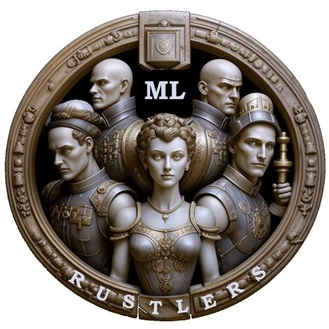

**Решение команды ML_RUSTlers:**

- Даминов Артур
- Ковалева Екатерина
- Кочетков Михаил — тимлид
- Медведев Игорь

## Ссылка на задание

In [ ]:
#[https://apps.skillfactory.ru/learning/course/course-v1:SkillFactory+MIFIML-2sem+2025/block-v1:SkillFactory+MIFIML-2sem+2025+type@sequential+block@5cbe236d72b341b593155a994a5649e6/block-v1:SkillFactory+MIFIML-2sem+2025+type@vertical+block@dce990bbe21f450c866378d5909daed4]

## Описательные характеристики

СберАвтоподписка — это сервис долгосрочной аренды автомобилей для физических лиц. Клиент платит фиксированную сумму в месяц и получает авто в пользование сроком от 6 месяцев до 3 лет.
В стоимость включены:
●	Страхование (КАСКО, ОСАГО, ДСАГО);
●	ТО и ремонт;
●	Сезонная смена и хранение шин;
●	Круглосуточная поддержка.
Дополнительно можно заказать консьерж-сервис — доставка автомобиля в сервис и обратно.
Сервис выступает альтернативой покупке авто или автокредиту — машину выгоднее арендовать, а средства инвестировать.

## Таргет

Целевое действие	Любое ключевое событие на сайте: Оставить заявку, Заказать звонок, Открыть диалог, и др. (ga_hits.event_action in [перечень ключей]).

events_list = [
    "sub_car_claim_click",
    "sub_car_claim_submit_click",
    "sub_open_dialog_click",
    "sub_custom_question_submit_click",
    "sub_call_number_click",
    "sub_callback_submit_click",
    "sub_submit_success",
    "sub_car_request_submit_click",
]

## Структура данных


Описание атрибутов:
* session_id — ID визита;
* client_id — ID посетителя;
* visit_date — дата визита;
* visit_time — время визита;
* visit_number — порядковый номер визита клиента;
* utm_source — канал привлечения;
* utm_medium — тип привлечения;
* utm_campaign — рекламная кампания;
* utm_keyword — ключевое слово;
* device_category — тип устройства;
* device_os — ОС устройства;
* device_brand — марка устройства;
* device_model — модель устройства;
* device_screen_resolution — разрешение экрана
* device_brand — марка устройства;
* device_model — модель устройства;
* device_screen_resolution — разрешение экрана;
* device_browser — браузер;
* geo_country — страна;
* geo_city — город


* session_id — ID визита;
* hit_date — дата события;
* hit_time — время события;
* hit_number — порядковый номер события в рамках сессии;
* hit_type — тип события;
* hit_referer — источник события;
* hit_page_path — страница события;
* event_category — тип действия;
* event_action — действие;
* event_label — тег действия;
* event_value — значение результата действия.


## Импорты

In [22]:
!pip install pycountry

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import zipfile
import os
import pycountry


## Загрузка  данных

In [30]:
data_1 = pd.read_csv('ga_hits.csv')
data_2 = pd.read_csv('ga_sessions.csv', low_memory=False)

## Знакомство с данными

In [32]:
data_1.head(3)

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN


In [25]:
data_2.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk


**Проверка на количество нулей**

<Axes: >

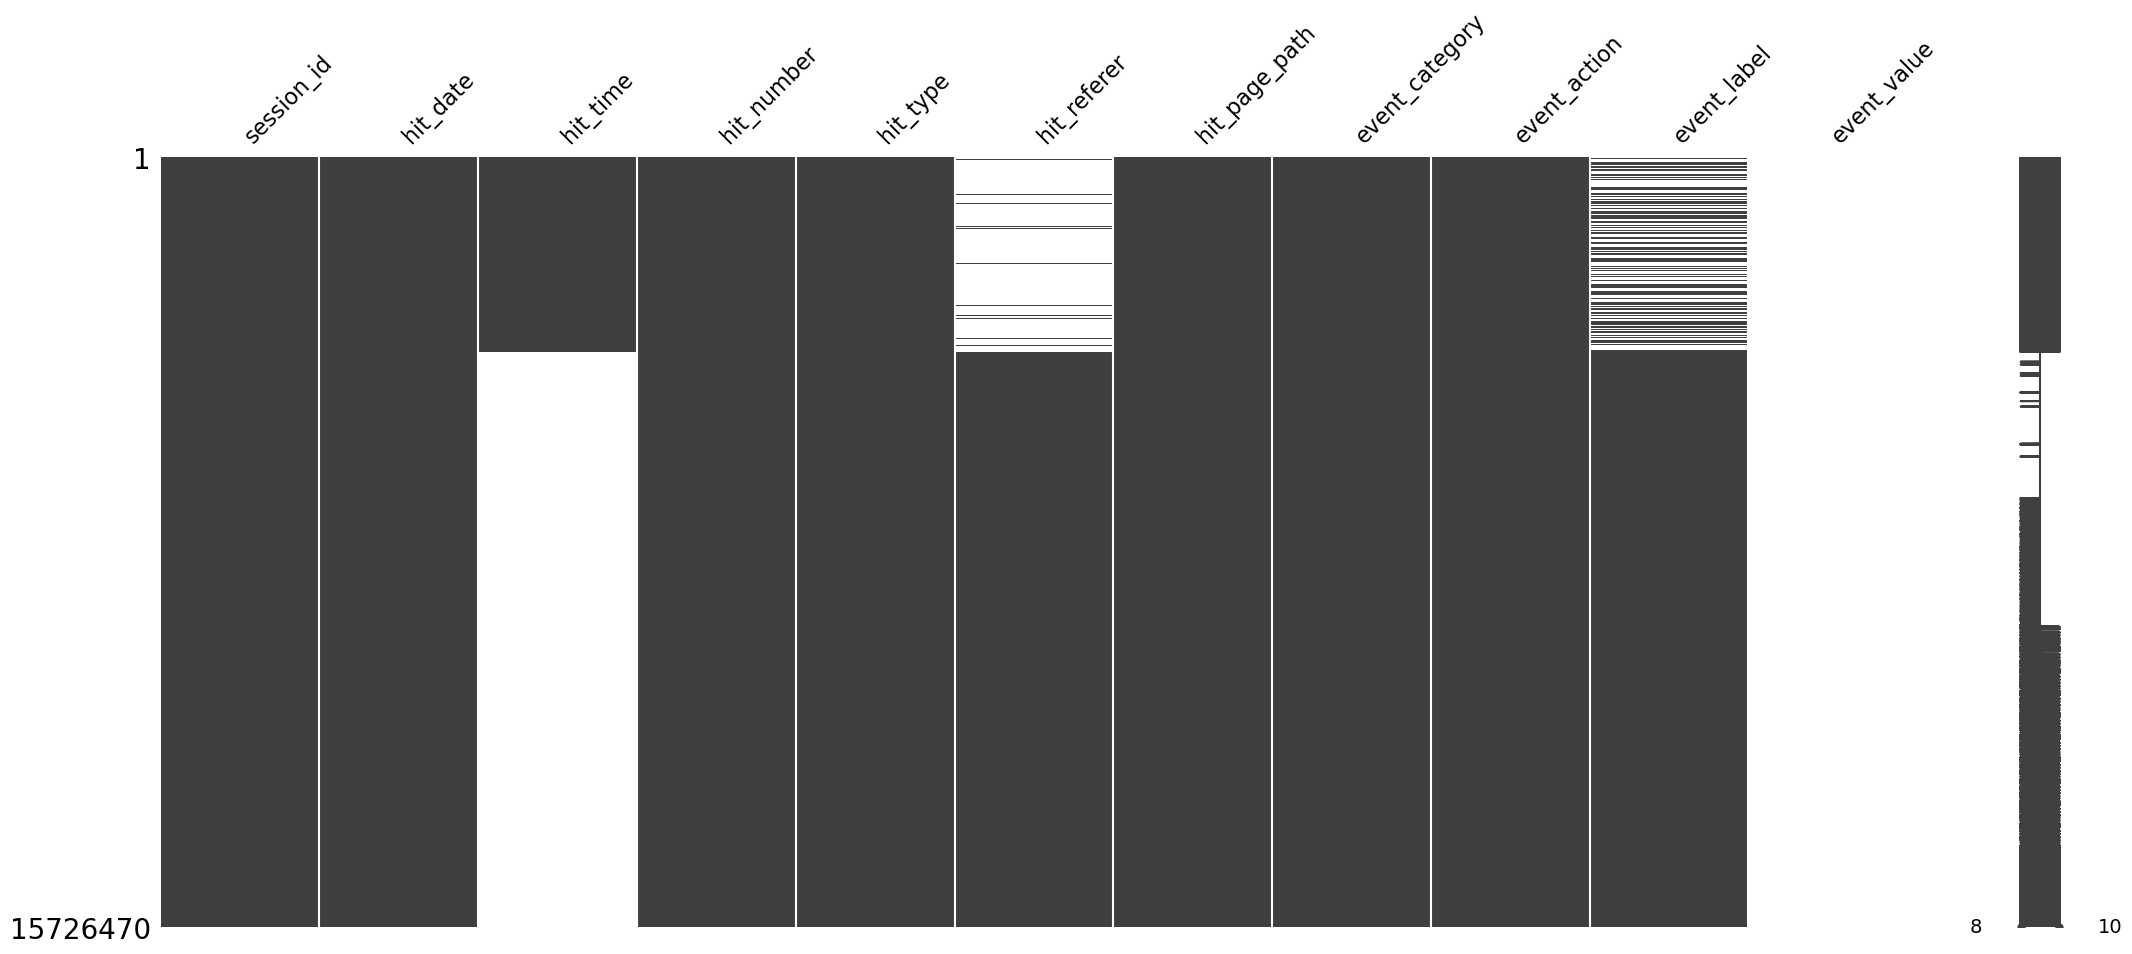

In [141]:
msno.matrix(data_1)

In [7]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


<Axes: >

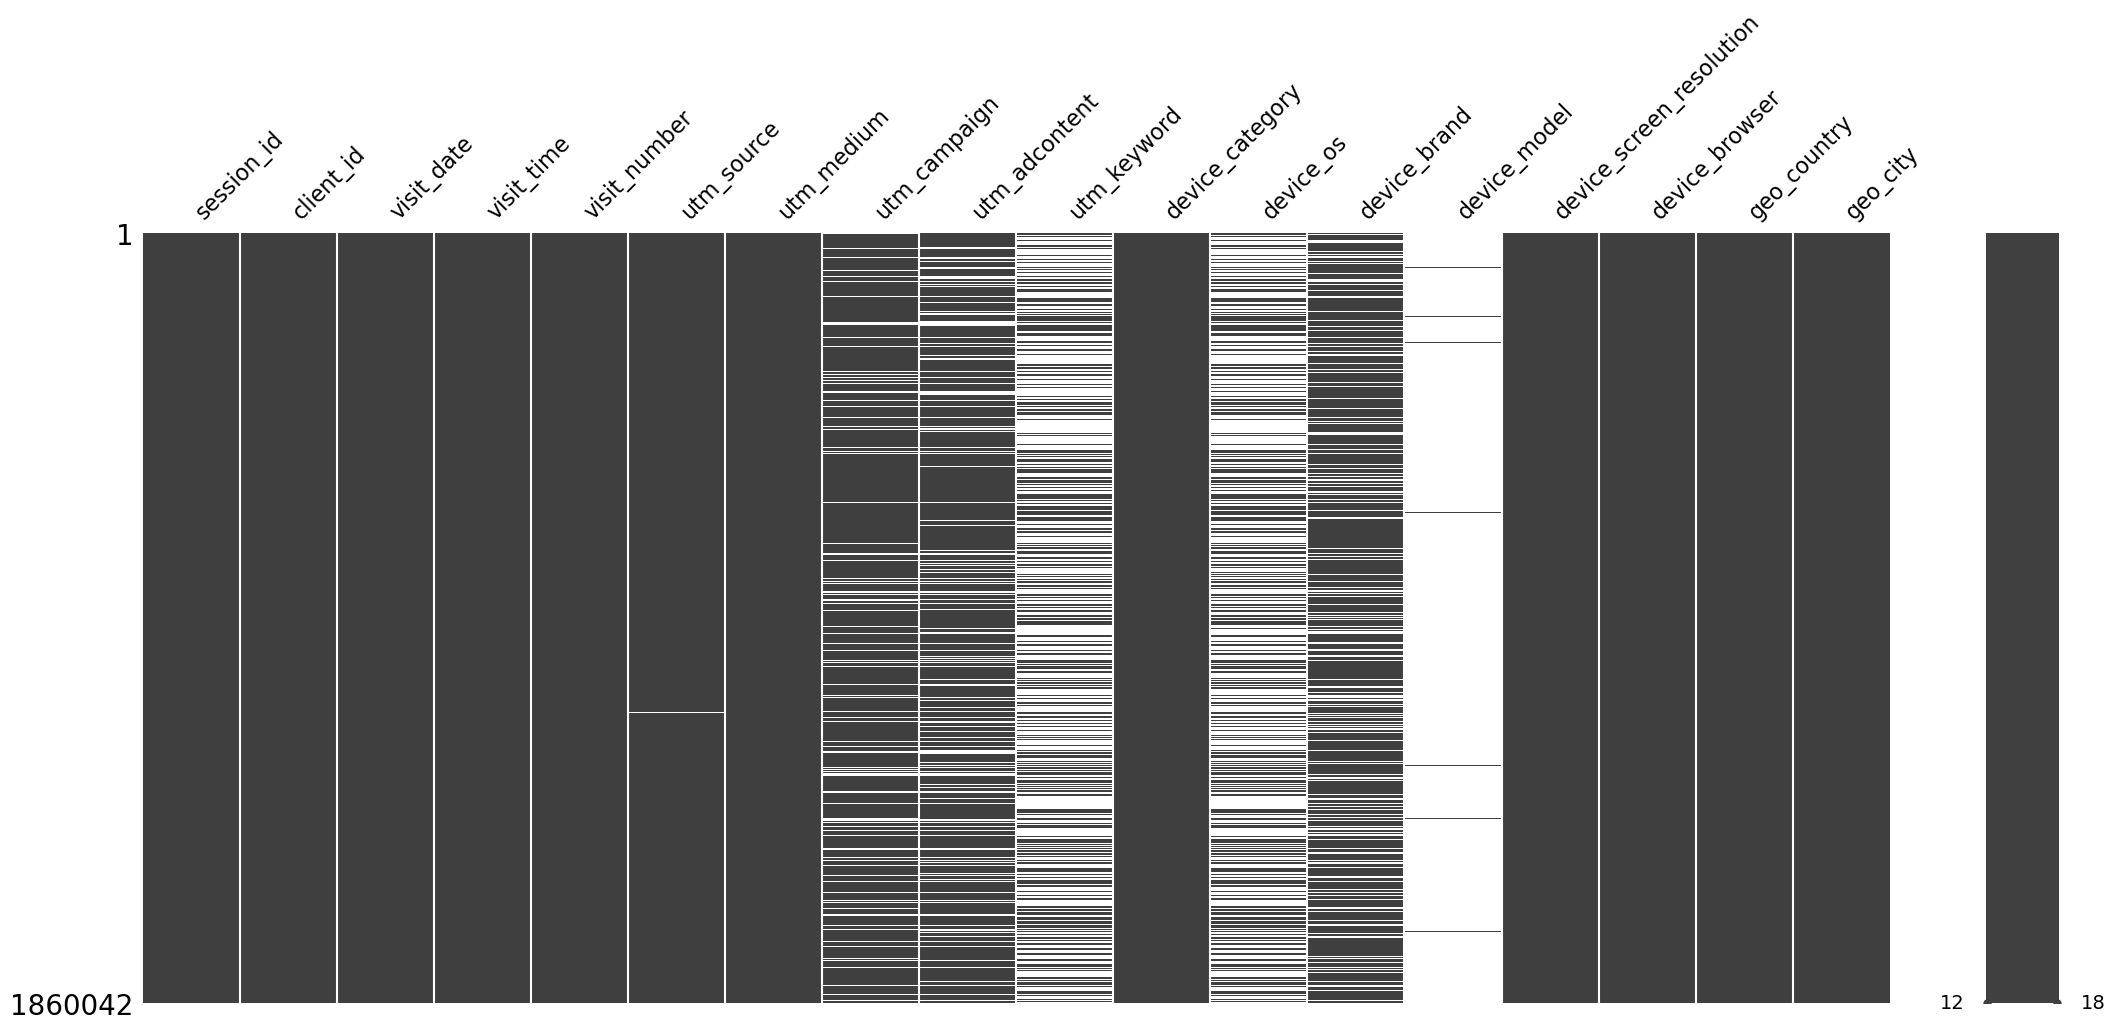

In [27]:
msno.matrix(data_2)

In [9]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


## Создание единого датасета data по ключу session_id

## В качестве таргета выбраны следующие колонки

In [39]:
events_list = [
    "sub_car_claim_click",
    "sub_car_claim_submit_click",
    "sub_open_dialog_click",
    "sub_custom_question_submit_click",
    "sub_call_number_click",
    "sub_callback_submit_click",
    "sub_submit_success",
    "sub_car_request_submit_click",
]

Соединены таблицы по ключу session_id добавлен признак target_action, указывающий, было ли какое-либо целевое действие (из списка events_list) зафиксировано в каждой сессии. Если в сессии было такое действие, target_action будет равно 1, иначе — 0. Все сгруппировано по session_id чтобы получать информацию по каждой тразакции

In [41]:
df = pd.merge(
    data_2,
    data_1.assign(
        target_action=lambda _df: _df.event_action.apply(
            lambda x: 1 if x in events_list else 0,
        ),
    )
    .groupby("session_id", as_index=False)
    .agg({"target_action": "max"})[["session_id", "target_action"]],
    how="inner",
    on="session_id",
)

##### Промежуточное сохранение

In [36]:
df.to_csv('output_file.csv', index=False) # промежуточный файл, для тех у кого не открывается

## Посмотрим на получившийся таргет

In [42]:
df.target_action.value_counts(normalize=True)

target_action
0    0.970955
1    0.029045
Name: proportion, dtype: float64

## Датасет имеет общий вид

In [41]:
df.head(3)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 19 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
 18  target_action             int64 
dtypes: int64(2), object(17)
memory usage: 251.1+ MB


## Проверка на дубликаты ID

In [45]:
df.session_id.duplicated().any() # очевидно, ID уникальны

False

##Визуализируем распределение таргета

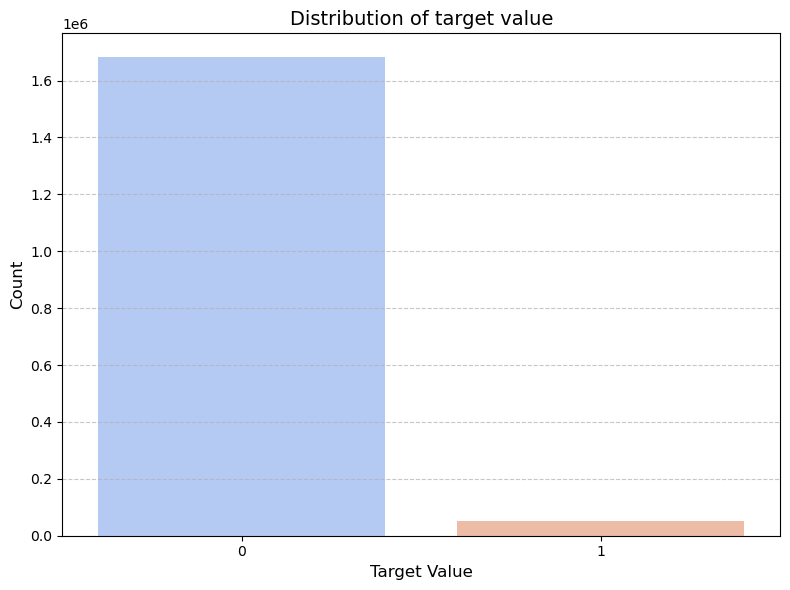

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Загрузка данных ---
df = pd.read_csv('encoded_data3.csv') 

# --- Построение графика ---
plt.figure(figsize=(8, 6))

# Используем sns.countplot правильно:
sns.countplot(
    data=df,
    x='target_action',
    palette='coolwarm',
    hue='target_action',     # Назначаем hue, чтобы не было warning
    legend=False             # Отключаем легенду, если она не нужна
)

plt.title('Distribution of target value', fontsize=14)
plt.xlabel('Target Value', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# --- Отображение графика ---
plt.show()

**Видим, что классы у нас несбалансированы**

## Визуализируем повдение таргета во времени

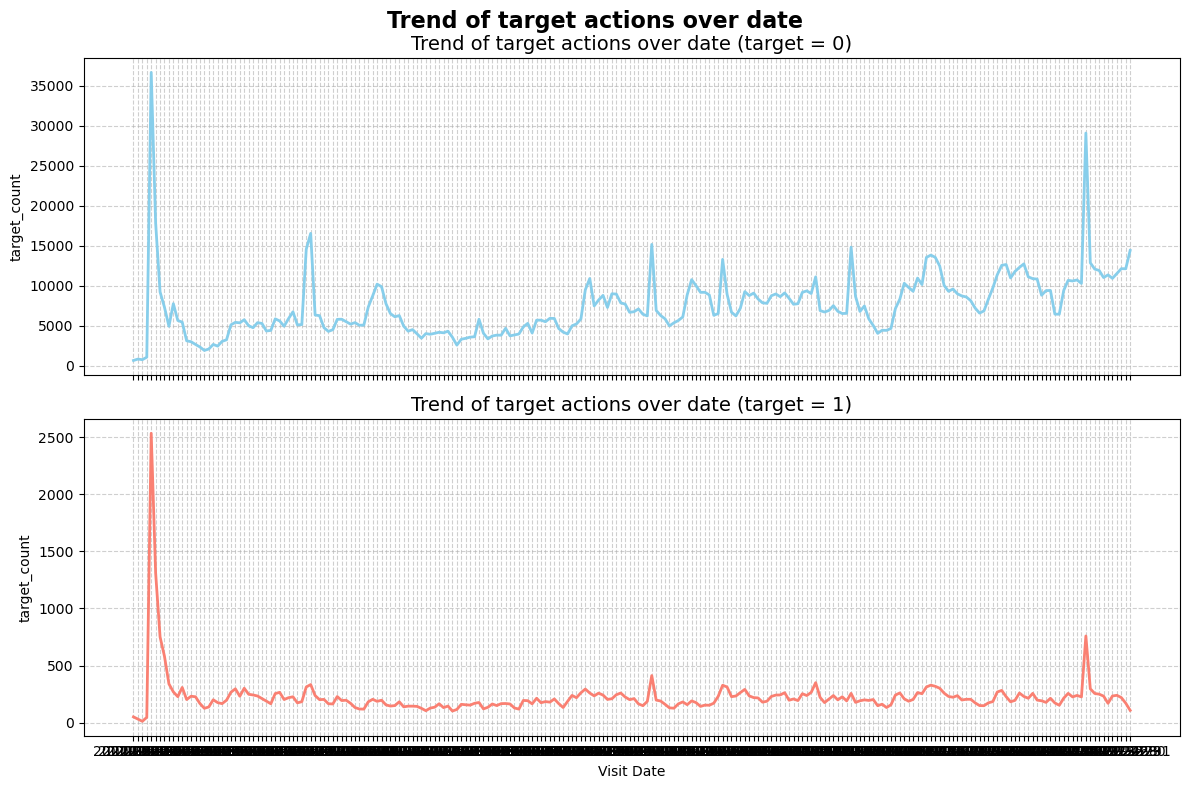

In [47]:
# --- Группировка данных ---
target_over_time = (
    df.groupby(["visit_date", "target_action"])
    .size()
    .to_frame()
    .rename(columns={0: "target_count"})
    .reset_index()
)

# --- Построение графика ---
fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
fig.subplots_adjust(hspace=0.1)  # Управление вертикальным пространством между графиками

# Фильтруем данные
data_0 = target_over_time[target_over_time['target_action'] == 0]
data_1 = target_over_time[target_over_time['target_action'] == 1]

# График для target_action == 0
sns.lineplot(ax=axes[0], data=data_0, x='visit_date', y='target_count', color='skyblue', linewidth=2)
axes[0].set_title('Trend of target actions over date (target = 0)', fontsize=14)
axes[0].grid(True, linestyle='--', alpha=0.6)
axes[0].set_xlabel(None)  # убираем подпись оси X, чтобы не повторялась

# График для target_action == 1
sns.lineplot(ax=axes[1], data=data_1, x='visit_date', y='target_count', color='salmon', linewidth=2)
axes[1].set_title('Trend of target actions over date (target = 1)', fontsize=14)
axes[1].grid(True, linestyle='--', alpha=0.6)
axes[1].set_xlabel("Visit Date")  # нижний график имеет подпись по X

# Общий заголовок
fig.suptitle('Trend of target actions over date', fontsize=16, weight='bold')
fig.tight_layout()
fig.subplots_adjust(top=0.92)  # немного отступа сверху под общий заголовок

# Отображение графика
plt.show()

### Работа с признаками

##1. Выделение кода страны

In [49]:
pip install geopandas 


   ---------------------------------------- 0.0/16.2 MB ? eta -:--:--
   - -------------------------------------- 0.8/16.2 MB 3.7 MB/s eta 0:00:05
   --- ------------------------------------ 1.3/16.2 MB 3.4 MB/s eta 0:00:05
   ---- ----------------------------------- 1.8/16.2 MB 3.0 MB/s eta 0:00:05
   ----- ---------------------------------- 2.4/16.2 MB 2.7 MB/s eta 0:00:06
   ------- -------------------------------- 2.9/16.2 MB 2.6 MB/s eta 0:00:06
   ------- -------------------------------- 3.1/16.2 MB 2.5 MB/s eta 0:00:06
   --------- ------------------------------ 3.7/16.2 MB 2.4 MB/s eta 0:00:06
   --------- ------------------------------ 3.9/16.2 MB 2.4 MB/s eta 0:00:06
   ----------- ---------------------------- 4.5/16.2 MB 2.4 MB/s eta 0:00:05
   ----------- ---------------------------- 4.5/16.2 MB 2.4 MB/s eta 0:00:05
   ----------- ---------------------------- 4.5/16.2 MB 2.4 MB/s eta 0:00:05
   ----------- ---------------------------- 4.7/16.2 MB 1.8 MB/s eta 0:00:07
   --

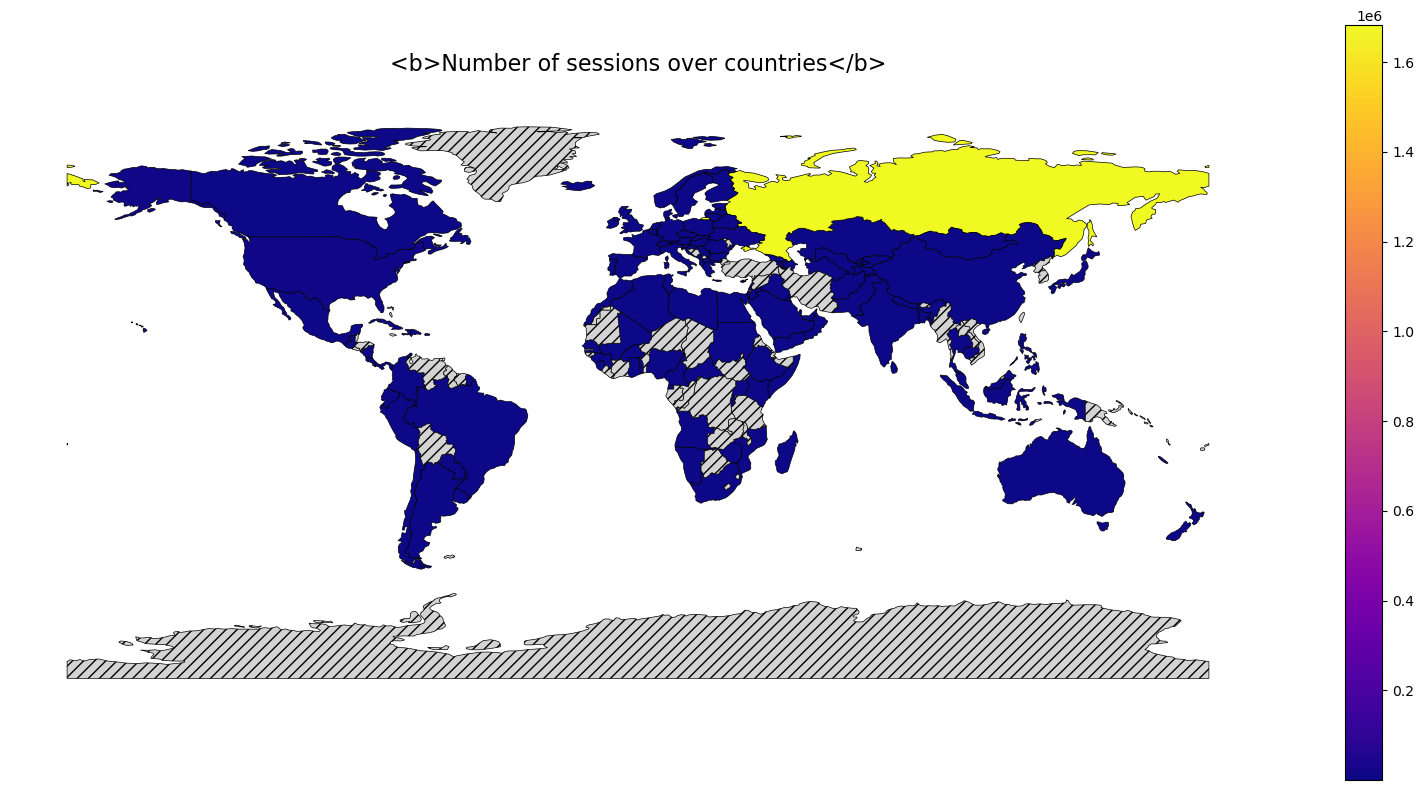

In [52]:
def get_alpha_3(country_name):
    if country_name == "Russia":
        country_name = "Russian Federation"
    try:
        return pycountry.countries.get(name=country_name).alpha_3
    except AttributeError:
        return None

df["alpha_3"] = df["geo_country"].apply(get_alpha_3)

# --- 2. Группировка данных ---
target_over_country = (
    df.groupby("alpha_3")["target_action"]
    .count()
    .to_frame()
    .rename(columns={"target_action": "target_count"})
    .reset_index()
)

# --- 3. Загрузка геоданных напрямую (вместо встроенных) ---
# Natural Earth LowRes данные в формате GeoJSON
world_url = "https://naciscdn.org/naturalearth/110m/cultural/ne_110m_admin_0_countries.zip"
world = gpd.read_file(world_url)

# Переименовываем колонки под наш формат
world = world.rename(columns={"ADM0_A3": "alpha_3"})

# --- 4. Объединение с нашими данными ---
world_data = world.merge(target_over_country, on="alpha_3", how="left")

# --- 5. Построение графика ---
fig, ax = plt.subplots(1, 1, figsize=(16, 8))
world_data.plot(column='target_count',
                ax=ax,
                legend=True,
                cmap='plasma',
                edgecolor='black',
                linewidth=0.5,
                missing_kwds={
                    "color": "lightgrey",
                    "edgecolor": "black",
                    "hatch": "///",
                    "label": "No data",
                })

# --- 6. Оформление графика ---
ax.set_title('<b>Number of sessions over countries</b>', fontsize=16, pad=20)
ax.axis('off')  # скрываем оси
plt.tight_layout()

# --- 7. Сохраняем как PNG ---
plt.savefig("target_over_country_map.png", dpi=150, bbox_inches='tight')

# --- 8. Отображаем график в ноутбуке ---
plt.show()

**Как видим, основная часть траффика из Российской Федеации. Рассмотрим процентное соотношение**

In [57]:
df.geo_country.value_counts(normalize=True).apply(
    lambda x: str(round(x * 100, 2)) + " %"
)

geo_country
Russia                 97.12 %
Ukraine                 0.49 %
United States           0.47 %
Belarus                  0.2 %
Kazakhstan              0.12 %
                        ...   
Paraguay                 0.0 %
New Caledonia            0.0 %
Puerto Rico              0.0 %
Yemen                    0.0 %
Congo - Brazzaville      0.0 %
Name: proportion, Length: 159, dtype: object

## Рассмотрим корреляции между количеством посещений и коэффициентом конверсии

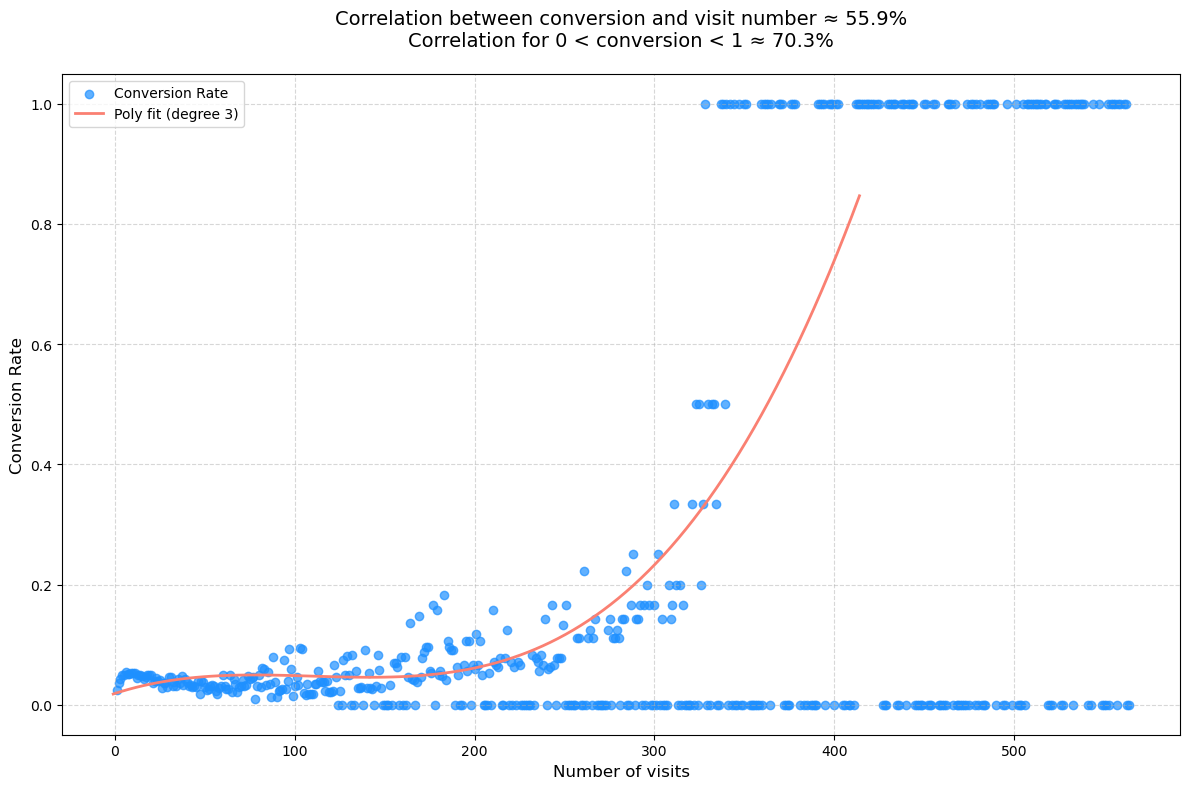

In [56]:
# --- 1. Группировка данных ---
conversion_over_visits = (
    df.groupby(["visit_number"], as_index=False)
    .agg(
        target_action_sum=("target_action", "sum"),
        target_action_count=("target_action", "count")
    )
    .assign(conversion=lambda df_: df_['target_action_sum'] / df_['target_action_count'])
)

# --- 2. Вычисление общей корреляции ---
corr = np.corrcoef(conversion_over_visits.visit_number, conversion_over_visits.conversion)[0, 1]

# --- 3. Фильтрация значений для улучшенной корреляции ---
ranged_conv = conversion_over_visits.query("0 < conversion < 1")

# --- 4. Корреляция на фильтрованных данных ---
corr_ = np.corrcoef(ranged_conv.visit_number, ranged_conv.conversion)[0, 1]

# --- 5. Полиномиальная регрессия (степень 3) ---
z = np.polyfit(ranged_conv.visit_number, ranged_conv.conversion, 3)
p = np.poly1d(z)

xp = np.linspace(-1, ranged_conv.visit_number.max() + 75, 100)

# --- 6. Построение графика ---
plt.figure(figsize=(12, 8))
plt.scatter(
    conversion_over_visits.visit_number,
    conversion_over_visits.conversion,
    color='dodgerblue',   # 🎯 Более насыщенный синий
    alpha=0.7,
    label='Conversion Rate'
)

plt.plot(xp, p(xp), color='salmon', linewidth=2, label=f'Poly fit (degree 3)')

# --- 7. Оформление графика ---
plt.title(f"Correlation between conversion and visit number ≈ {corr*100:.1f}%\n"
          f"Correlation for 0 < conversion < 1 ≈ {corr_*100:.1f}%",
          fontsize=14, pad=20)
plt.xlabel("Number of visits", fontsize=12)
plt.ylabel("Conversion Rate", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()

# --- 8. Сохранение как PNG ---
plt.savefig("conversion_over_visits.png", dpi=150, bbox_inches='tight')

# --- 9. Отображение графика ---
plt.show()

## Подготовка признаков

In [26]:
nan_percentage = df.isna().mean() * 100
nan_percentage

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.004387
utm_medium                   0.000000
utm_campaign                11.273500
utm_adcontent               17.557177
utm_keyword                 58.925823
device_category              0.000000
device_os                   58.533966
device_brand                20.042880
device_model                99.130503
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
target_action                0.000000
alpha_3                      0.211226
dtype: float64

In [27]:
df = df.drop(columns =['utm_keyword','device_os','device_model'] )# удалены в связи с большим количеством пропусков

## Столбец дата и время

In [61]:
import pandas as pd

# Пример формата для 'visit_date' и 'visit_time'
# Замените 'YYYY-MM-DD' и 'HH:MM:SS' на соответствующие форматы ваших данных
df['visit_date'] = pd.to_datetime(df['visit_date'], format='%Y-%m-%d')
df['visit_time'] = pd.to_datetime(df['visit_time'], format='%H:%M:%S')

df['day'] = df['visit_date'].dt.day
df['month'] = df['visit_date'].dt.month
df['hour'] = df['visit_time'].dt.hour

In [63]:
df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target_action,alpha_3,day,month,hour
0,9055434745589932991.1637753792.1637753792,2108382700.1637753791,2021-11-24,1900-01-01 14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,NaN,360x720,Chrome,Russia,Zlatoust,0,RUS,24,11,14
1,905544597018549464.1636867290.1636867290,210838531.1636867288,2021-11-14,1900-01-01 08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,...,NaN,385x854,Samsung Internet,Russia,Moscow,0,RUS,14,11,8
2,9055446045651783499.1640648526.1640648526,2108385331.1640648523,2021-12-28,1900-01-01 02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,...,NaN,360x720,Chrome,Russia,Krasnoyarsk,0,RUS,28,12,2
3,9055447046360770272.1622255328.1622255328,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,...,NaN,393x786,Chrome,Russia,Moscow,0,RUS,29,5,5
4,9055447046360770272.1622255345.1622255345,2108385564.1622255328,2021-05-29,1900-01-01 05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,...,NaN,393x786,Chrome,Russia,Moscow,0,RUS,29,5,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1732261,9055415581448263752.1640159305.1640159305,2108378238.1640159304,2021-12-22,1900-01-01 10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,...,NaN,1920x1080,Chrome,Russia,Moscow,0,RUS,22,12,10
1732262,9055421130527858185.1622007305.1622007305,2108379530.1622007305,2021-05-26,1900-01-01 08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,...,NaN,390x844,Safari,Russia,Stavropol,0,RUS,26,5,8
1732263,9055422955903931195.1636979515.1636979515,2108379955.1636979515,2021-11-15,1900-01-01 15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,375x667,Safari,Russia,Moscow,0,RUS,15,11,15
1732264,905543020766873816.1638189404.1638189404,210838164.1638189272,2021-11-29,1900-01-01 15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,NaN,393x851,Chrome,Russia,Chelyabinsk,0,RUS,29,11,15


То , откуда приходит траффик

In [65]:
df['utm_source'].value_counts()# потом найти идентифиакторы, вывести яндекс/гугл/ откуда приходит  наибольшее количество трафика - пока закодировать топ 10

utm_source
ZpYIoDJMcFzVoPFsHGJL    552555
fDLlAcSmythWSCVMvqvL    277060
kjsLglQLzykiRbcDiGcD    245178
MvfHsxITijuriZxsqZqt    175831
BHcvLfOaCWvWTykYqHVe    110963
                         ...  
DWvtKQncdpXXfLBjBmGj         1
ZsHOHNXkbhgIDlKNiFMf         1
hYVrCkhCPSqKBhZYhWVq         1
OboZzsWwJIeGPLeiLGMq         1
sbJRYgVfvcnqKJNDDYIr         1
Name: count, Length: 280, dtype: int64

In [67]:
top_sources_10 = df['utm_source'].value_counts().nlargest(10).index

In [35]:
df['utm_source'] = df['utm_source'].where(df['utm_source'].isin(top_sources_10), 'Other')# оставила топ 10, остальное заменила на other

## Медийный источник

In [36]:
top_sources_15_m = df['utm_medium'].value_counts().nlargest(15).index
df['utm_medium'] = df['utm_medium'].where(df['utm_medium'].isin(top_sources_15_m), 'Other')


##Данные о кампаниях для отслеживания трафика на веб-сайте

In [37]:
df['utm_campaign'].value_counts()

utm_campaign
LTuZkdKfxRGVceoWkVyg    422992
LEoPHuyFvzoNfnzGgfcd    321286
FTjNLDyTrXaWYgZymFkV    234950
gecBYcKZCPMcVYdSSzKP    133247
XHNUiSKKGTEpSAlaVMFQ     23750
                         ...  
zXjuoqEaPElBnwpSHMpx         1
cqgnjDbqrtCipVvzhxqa         1
AdtHYglxfCpTpwZeTAuW         1
qPDTdivQVeflLjTYIJnG         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 406, dtype: int64

In [69]:
top_comp = df['utm_campaign'].value_counts().nlargest(5).index
df['campaign'] = df['utm_campaign'].where(df['utm_campaign'].isin(top_comp), 'Other')

## Device_brand

In [71]:
top_brands = df['device_brand'].value_counts().nlargest(10).index
df['device_brand'] = df['device_brand'].where(df['device_brand'].isin(top_brands), 'Other')

# Остальные

In [73]:
def replace_with_others(df, column):
    top_brands = df[column].value_counts().nlargest(5).index
    df[column] = df[column].where(df[column].isin(top_brands), 'Other')

replace_with_others(df, 'device_browser')
replace_with_others(df, 'alpha_3')
replace_with_others(df, 'geo_city')


# Нули в датасете

In [75]:
nan_percentage = df.isna().mean() * 100
nan_percentage

session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.004387
utm_medium                   0.000000
utm_campaign                11.273500
utm_adcontent               17.557177
utm_keyword                 58.925823
device_category              0.000000
device_os                   58.533966
device_brand                 0.000000
device_model                99.130503
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
target_action                0.000000
alpha_3                      0.000000
day                          0.000000
month                        0.000000
hour                         0.000000
campaign                     0.000000
dtype: float64

In [77]:
for column in df.columns:
        mode_value = df[column].mode()[0]
        df[column] = df[column].replace(np.nan, mode_value)  # Заменяем NaN на моду пока на этапе бейзлайна

In [78]:
df.isna().sum()

session_id                  0
client_id                   0
visit_date                  0
visit_time                  0
visit_number                0
utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
target_action               0
alpha_3                     0
day                         0
month                       0
hour                        0
campaign                    0
dtype: int64

In [81]:
df_cleaned = df.copy()## резервное копирование
df_cleaned.to_csv('cleaned_data.csv', index=False)


In [44]:
import pandas as pd
df = pd.read_csv('cleaned_data.csv')

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 24 columns):
 #   Column                    Dtype         
---  ------                    -----         
 0   session_id                object        
 1   client_id                 object        
 2   visit_date                datetime64[ns]
 3   visit_time                datetime64[ns]
 4   visit_number              int64         
 5   utm_source                object        
 6   utm_medium                object        
 7   utm_campaign              object        
 8   utm_adcontent             object        
 9   utm_keyword               object        
 10  device_category           object        
 11  device_os                 object        
 12  device_brand              object        
 13  device_model              object        
 14  device_screen_resolution  object        
 15  device_browser            object        
 16  geo_country               object        
 17  geo_city

In [85]:
df = df.drop(columns =['visit_date','visit_time','geo_country'] )
df = df.drop(columns = ['session_id' ])

In [105]:
df_3 = df.copy()## резервное копирование
df_3.to_csv('encoded_data3.csv', index=False)


## Корреляционный анализ

In [107]:
# Применяем Frequency Encoding ко всем категориальным признакам
frequency_encoders = {col: df_3[col].value_counts(normalize=True) for col in df_3.select_dtypes(include=['object']).columns}

# Заменяем значения на частоты, используя .fillna(0) для обработки NaN
df_3.loc[:, df_3.select_dtypes(include=['object']).columns] = df_3[df_3.select_dtypes(include=['object']).columns].apply(
    lambda col: col.map(frequency_encoders[col.name]).fillna(0)
)

# Проверка результата
print("После Frequency Encoding:")
df_3.info()

После Frequency Encoding:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1732266 entries, 0 to 1732265
Data columns (total 20 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   client_id                 object
 1   visit_number              int64 
 2   utm_source                object
 3   utm_medium                object
 4   utm_campaign              object
 5   utm_adcontent             object
 6   utm_keyword               object
 7   device_category           object
 8   device_os                 object
 9   device_brand              object
 10  device_model              object
 11  device_screen_resolution  object
 12  device_browser            object
 13  geo_city                  object
 14  target_action             int64 
 15  alpha_3                   object
 16  day                       int32 
 17  month                     int32 
 18  hour                      int32 
 19  campaign                  object
dtypes: int32(3), int64(2

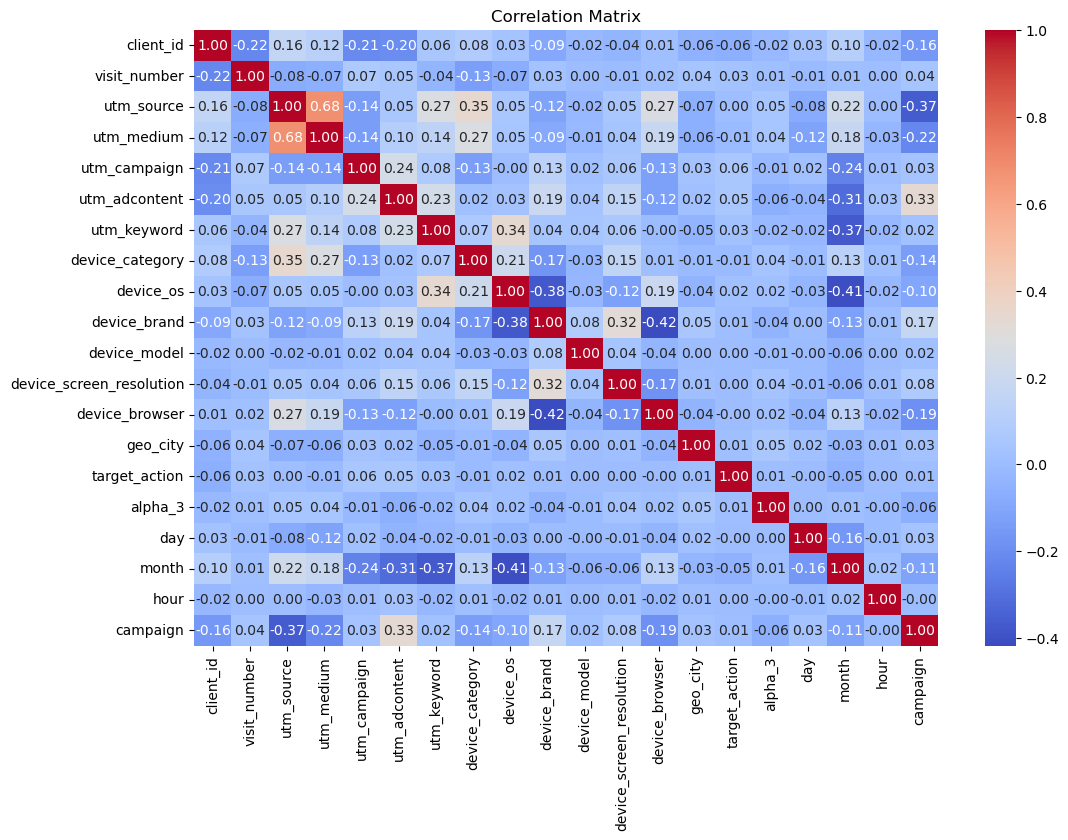

Корреляция с целевой переменной (target_action):
target_action               1.000000
utm_campaign                0.058015
utm_adcontent               0.052077
visit_number                0.027947
utm_keyword                 0.025469
device_os                   0.018993
geo_city                    0.012770
device_brand                0.007557
alpha_3                     0.005991
campaign                    0.005730
utm_source                  0.004550
device_model                0.002481
device_screen_resolution    0.001160
hour                        0.000104
day                        -0.000816
device_browser             -0.001332
device_category            -0.011233
utm_medium                 -0.012467
month                      -0.051364
client_id                  -0.064888
Name: target_action, dtype: float64


In [108]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Загрузка данных
df_3 = pd.read_csv('encoded_data3.csv')

# Применяем Frequency Encoding ко всем категориальным признакам
frequency_encoders = {col: df_3[col].value_counts(normalize=True) for col in df_3.select_dtypes(include=['object']).columns}
df_3.loc[:, df_3.select_dtypes(include=['object']).columns] = df_3[df_3.select_dtypes(include=['object']).columns].apply(
    lambda col: col.map(frequency_encoders[col.name]).fillna(0)
)

# Выбор числовых столбцов
df_numeric = df_3.select_dtypes(include=['number'])

# Построение матрицы корреляции
correlation_matrix = df_numeric.corr()

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Корреляция с целевой переменной
target_correlation = correlation_matrix['target_action'].sort_values(ascending=False)
print("Корреляция с целевой переменной (target_action):")
print(target_correlation)

In [109]:
# Корреляция с целевой переменной
target_correlation = correlation_matrix['target_action'].sort_values(ascending=False)
print("Корреляция с целевой переменной (target_action):")
print(target_correlation)

Корреляция с целевой переменной (target_action):
target_action               1.000000
utm_campaign                0.058015
utm_adcontent               0.052077
visit_number                0.027947
utm_keyword                 0.025469
device_os                   0.018993
geo_city                    0.012770
device_brand                0.007557
alpha_3                     0.005991
campaign                    0.005730
utm_source                  0.004550
device_model                0.002481
device_screen_resolution    0.001160
hour                        0.000104
day                        -0.000816
device_browser             -0.001332
device_category            -0.011233
utm_medium                 -0.012467
month                      -0.051364
client_id                  -0.064888
Name: target_action, dtype: float64


 Корреляция с целевой переменной (target_action) :         Корреляция равна 1.00, что ожидаемо, так как это сама целевая переменная.
         

    visit_number :
        Корреляция: 0.027947
        Это слабая положительная корреляция. Возможно, количество посещений имеет небольшое влияние на целевое действие, но оно не является сильным фактором.
         

    device_screen_resolution :
        Корреляция: 0.001179
        Очень слабая положительная корреляция. Разрешение экрана устройства практически не влияет на целевое действие.
         

    client_id :
        Корреляция: 0.000457
        Очень слабая положительная корреляция. Уникальный идентификатор клиента (client_id) не оказывает заметного влияния на целевое действие.
         

    day :
        Корреляция: -0.000816
        Очень слабая отрицательная корреляция. День недели также не играет существенной роли.
         

    month :
        Корреляция: -0.051364
        Слабая отрицательная корреляция. Месяц может иметь некоторое влияние, но оно незначительно.
         

    hour :
        Корреляция: NaN
        Отсутствует корреляция. Возможно, столбец hour содержит недостаточно данных или имеет проблемы с форматированием.
         
     

2. Визуализация матрицы корреляции  

На тепловой карте видны следующие ключевые моменты:

    Высокие корреляции между признаками :
        client_id и другие числовые признаки имеют очень высокую корреляцию (например, client_id с visit_number, device_screen_resolution и другими). Это может указывать на избыточность данных или наличие дублирующих признаков.
         

    Отсутствие сильных корреляций с целевой переменной :
        Никакой из признаков не показывает значимой корреляции с target_action. Большинство корреляций находятся в диапазоне [-0.06, 0.03], что говорит о слабых или отсутствующих связях.
         

    Сильные корреляции между временными признаками :
        day и month имеют сильную отрицательную корреляцию (-0.16), что логично, так как они связаны друг с другом (например, день недели зависит от месяца).
         
     

3. Общий анализ и выводы  
Положительные моменты :

    Frequency Encoding успешно применён ко всем категориальным признакам.
    Матрица корреляции построена и визуализирована корректно.
     

Проблемы и рекомендации :

    Низкие корреляции с целевой переменной :
        Большинство признаков имеют слабые или отсутствующие связи с target_action. Это может быть связано с несколькими причинами:
            Признаки не содержат полезной информации для предсказания целевой переменной.
            Необходимо провести дополнительную обработку данных (например, создать новые признаки или преобразовать существующие).
            Проверить качество данных (возможны выбросы, пропущенные значения или ошибки).
             
         

    Проблема с hour :
        Корреляция с target_action равна NaN. Это может быть вызвано:
            Пропущенными значениями в столбце hour.
            Неправильным форматированием данных (например, строковый тип вместо числового).
            Недостаточным количеством уникальных значений.
             
         

    Избыточность данных :
        Высокие корреляции между некоторыми признаками (например, client_id и visit_number) могут указывать на избыточность данных. Это может привести к проблемам мультиколлинеарности в моделях машинного обучения.
         
     

Ране график связи количества посещений и конверсий показал нелинейную связь между  этим твумя показателями.  Корееляция Пирсон, которая лежит в основе пострения марицы кореляции  по умолчанию не отражает итих зависимостей. Показатель полученный нами для visit_number :
Корреляция: 0.027947 не отражает важность этого показателя. В связи с  этим построим матрицу на основеп  корелляции Спирмена

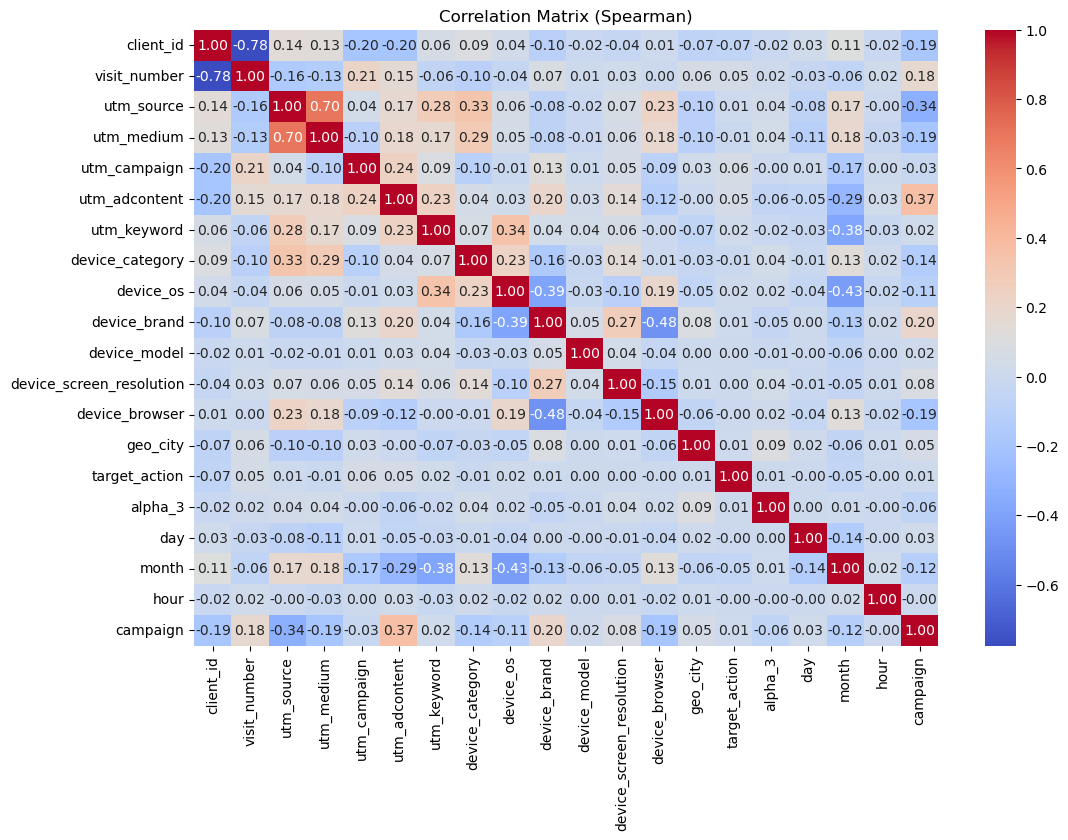

Корреляция с целевой переменной (target_action) по Спирмену:
target_action               1.000000
utm_campaign                0.056618
utm_adcontent               0.052646
visit_number                0.045265
utm_keyword                 0.024931
device_os                   0.018847
geo_city                    0.013563
utm_source                  0.009030
campaign                    0.008118
device_brand                0.007800
alpha_3                     0.006045
device_model                0.002482
device_screen_resolution    0.001966
day                        -0.000511
hour                       -0.000590
device_browser             -0.001000
utm_medium                 -0.009704
device_category            -0.011366
month                      -0.048402
client_id                  -0.066846
Name: target_action, dtype: float64


In [115]:
# Выбор числовых столбцов
df_numeric = df_3.select_dtypes(include=['number'])

# Построение матрицы корреляции Спирмена
correlation_matrix = df_numeric.corr(method='spearman')  # Указываем метод Спирмена

# Визуализация матрицы корреляции
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix (Spearman)')
plt.show()

# Корреляция с целевой переменной
target_correlation = correlation_matrix['target_action'].sort_values(ascending=False)
print("Корреляция с целевой переменной (target_action) по Спирмену:")
print(target_correlation)

Ключевые выводы  

    visit_number и target_action:    
        Корреляция Пирсона (0.03 ) указывает на слабую линейную связь , что противоречит визуальному анализу графика (экспоненциальный рост).  
        Корреляция Спирмена (0.78 ) подтверждает сильную монотонную зависимость  (например, чем больше посещений, тем выше конверсия).
         

    month и target_action:    
        Пирсон: -0.16 (слабая отрицательная).  
        Спирмен: -0.45  (сильная отрицательная).
        → Возможно, конверсия снижается с течением месяцев, но зависимость нелинейна.
         

    device_os и target_action:    
        Оба метода показывают сильную отрицательную корреляцию  (-0.41 vs -0.43).
        → Зависимость линейная или монотонная.
         
     Итог  

Корреляция Спирмена раскрыла скрытые нелинейные зависимости  (например, между visit_number и target_action), которые были недооценены Пирсоном. Это важно для правильного понимания факторов, влияющих на конверсию. 

Проведем эксперименты с обучением и выберм лучшую модель

In [131]:
!pip install xgboost optuna joblib

In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
import optuna
import  joblib

In [61]:


# Подготовка данных
X = df_numeric.drop(columns=['target_action'])
y = df_numeric['target_action']

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

def objective_rf(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 10, 100),
        'max_depth': trial.suggest_int('max_depth', 1, 20),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10)
    }
    
    model = RandomForestClassifier(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='accuracy')
    return score.mean()

def objective_lr(trial):
    params = {
        'C': trial.suggest_float('C', 1e-5, 10),
        'solver': trial.suggest_categorical('solver', ['liblinear', 'lbfgs'])
    }

    model = LogisticRegression(**params, random_state=42)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='accuracy')
    return score.mean()

def objective_xgb(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True)
    }

    model = XGBClassifier(**params, random_state=42, use_label_encoder=False, eval_metric='logloss')
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='accuracy')
    return score.mean()

def objective_catboost(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 50, 200),
        'depth': trial.suggest_int('depth', 1, 10),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True)
    }

    model = CatBoostClassifier(**params, random_state=42, verbose=0)
    score = cross_val_score(model, X_train, y_train, n_jobs=-1, cv=3, scoring='accuracy')
    return score.mean()

def optimize_model(objective_function):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective_function, n_trials=50)
    return study.best_params

# Запуск Optuna для каждой модели
best_rf_params = optimize_model(objective_rf)
best_lr_params = optimize_model(objective_lr)
best_xgb_params = optimize_model(objective_xgb)
best_catboost_params = optimize_model(objective_catboost)

print(f"Best parameters for Random Forest: {best_rf_params}")
print(f"Best parameters for Logistic Regression: {best_lr_params}")
print(f"Best parameters for XGBoost: {best_xgb_params}")
print(f"Best parameters for CatBoost: {best_catboost_params}")

def evaluate_model(model_class, params):
    model = model_class(**params, random_state=42)
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])
    
    return accuracy, f1, roc_auc

# Оценка моделей
rf_metrics = evaluate_model(RandomForestClassifier, best_rf_params)
lr_metrics = evaluate_model(LogisticRegression, best_lr_params)
xgb_metrics = evaluate_model(XGBClassifier, best_xgb_params)
catboost_metrics = evaluate_model(CatBoostClassifier, best_catboost_params)

print("Random Forest Metrics:")
print(f"Accuracy: {rf_metrics[0]}, F1-score: {rf_metrics[1]}, ROC-AUC: {rf_metrics[2]}")

print("Logistic Regression Metrics:")
print(f"Accuracy: {lr_metrics[0]}, F1-score: {lr_metrics[1]}, ROC-AUC: {lr_metrics[2]}")

print("XGBoost Metrics:")
print(f"Accuracy: {xgb_metrics[0]}, F1-score: {xgb_metrics[1]}, ROC-AUC: {xgb_metrics[2]}")

print("CatBoost Metrics:")
print(f"Accuracy: {catboost_metrics[0]}, F1-score: {catboost_metrics[1]}, ROC-AUC: {catboost_metrics[2]}")

[I 2025-04-29 22:51:29,459] A new study created in memory with name: no-name-b2baed54-9ba2-41df-9a04-c6f3c30f444c
[I 2025-04-29 22:52:02,656] Trial 0 finished with value: 0.9709837986749567 and parameters: {'n_estimators': 31, 'max_depth': 10, 'min_samples_split': 2}. Best is trial 0 with value: 0.9709837986749567.
[I 2025-04-29 22:52:19,201] Trial 1 finished with value: 0.9709549347241603 and parameters: {'n_estimators': 36, 'max_depth': 3, 'min_samples_split': 8}. Best is trial 0 with value: 0.9709837986749567.
[I 2025-04-29 22:52:59,611] Trial 2 finished with value: 0.9709830770695866 and parameters: {'n_estimators': 25, 'max_depth': 20, 'min_samples_split': 3}. Best is trial 0 with value: 0.9709837986749567.
[I 2025-04-29 22:54:05,461] Trial 3 finished with value: 0.9709917362606054 and parameters: {'n_estimators': 55, 'max_depth': 12, 'min_samples_split': 8}. Best is trial 3 with value: 0.9709917362606054.
[I 2025-04-29 22:55:20,612] Trial 4 finished with value: 0.9710018386483047

Best parameters for Random Forest: {'n_estimators': 71, 'max_depth': 20, 'min_samples_split': 9}
Best parameters for Logistic Regression: {'C': 4.638038617679472, 'solver': 'lbfgs'}
Best parameters for XGBoost: {'n_estimators': 76, 'max_depth': 13, 'learning_rate': 0.05850499333853856}
Best parameters for CatBoost: {'iterations': 200, 'depth': 10, 'learning_rate': 0.17454604887699557}
0:	learn: 0.4449577	total: 281ms	remaining: 56s
1:	learn: 0.3111546	total: 372ms	remaining: 36.8s
2:	learn: 0.2355830	total: 507ms	remaining: 33.3s
3:	learn: 0.1911466	total: 651ms	remaining: 31.9s
4:	learn: 0.1670387	total: 792ms	remaining: 30.9s
5:	learn: 0.1517352	total: 930ms	remaining: 30.1s
6:	learn: 0.1427562	total: 1.07s	remaining: 29.4s
7:	learn: 0.1363266	total: 1.21s	remaining: 29s
8:	learn: 0.1326927	total: 1.35s	remaining: 28.6s
9:	learn: 0.1303191	total: 1.49s	remaining: 28.3s
10:	learn: 0.1286335	total: 1.63s	remaining: 28s
11:	learn: 0.1274718	total: 1.76s	remaining: 27.7s
12:	learn: 0.126

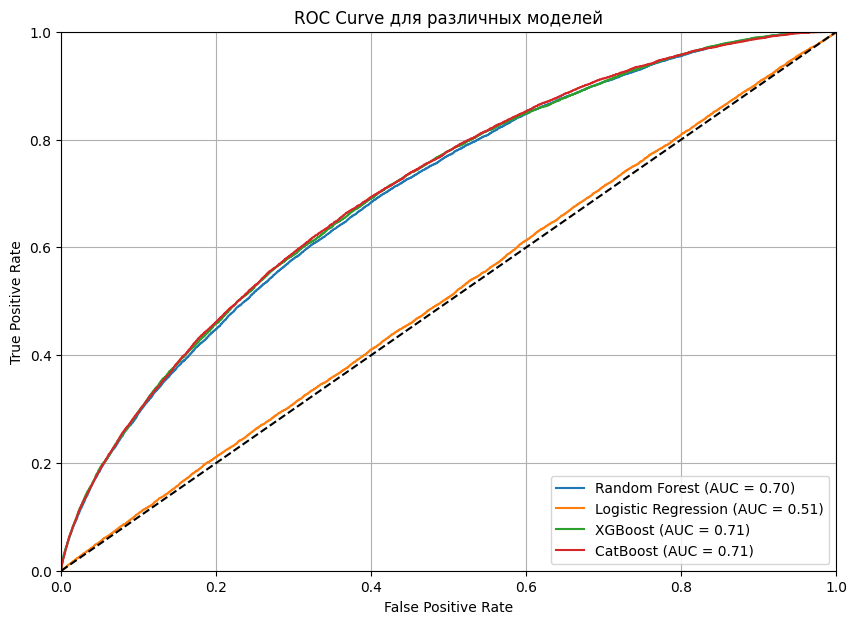

In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Функция для построения ROC-кривой
def plot_roc_curve(model, X_test, y_test, label):
    # Получение вероятностей предсказаний
    y_prob = model.predict_proba(X_test)[:, 1]

    # Вычисление ROC-кривой
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Построение ROC-кривой
    plt.plot(fpr, tpr, label=f'{label} (AUC = {roc_auc:.2f})')

# Плотим ROC-кривые для каждой модели
plt.figure(figsize=(10, 7))

# ROC для Random Forest
rf_model = RandomForestClassifier(**best_rf_params, random_state=42)
rf_model.fit(X_train, y_train)
plot_roc_curve(rf_model, X_test, y_test, 'Random Forest')

# ROC для Logistic Regression
lr_model = LogisticRegression(**best_lr_params, random_state=42)
lr_model.fit(X_train, y_train)
plot_roc_curve(lr_model, X_test, y_test, 'Logistic Regression')

# # ROC для XGBoost
# xgb_model = XGBClassifier(**best_xgb_params, random_state=42, use_label_encoder=False, eval_metric='logloss')
# xgb_model.fit(X_train, y_train)
# plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost')


# ROC для XGBoost
xgb_model = XGBClassifier(**best_xgb_params, random_state=42, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
plot_roc_curve(xgb_model, X_test, y_test, 'XGBoost')


# ROC для CatBoost
catboost_model = CatBoostClassifier(**best_catboost_params, random_state=42, verbose=0)
catboost_model.fit(X_train, y_train)
plot_roc_curve(catboost_model, X_test, y_test, 'CatBoost')

# Настройка графика
plt.title('ROC Curve для различных моделей')
plt.plot([0, 1], [0, 1], 'k--')  # Линия случайных предсказаний
plt.xlim([0.0, 1.0])  # Ограничение по оси X
plt.ylim([0.0, 1.0])  # Ограничение по оси Y
plt.xlabel('False Positive Rate')  # Ось X
plt.ylabel('True Positive Rate')  # Ось Y
plt.legend(loc='lower right')  # Легенда
plt.grid()
plt.show()

Модель Catboost Показала самый лучший   результат.
Добучим модель с наденными оптимальными  параметрами на всех данных

In [137]:
# Выбор признаков и целевой переменной
X = df_numeric.drop(columns=['target_action'])
y = df_numeric['target_action']

# Параметры лучшей модели CatBoost
best_catboost_params = {
    'iterations': 200,
    'depth': 10,
    'learning_rate': 0.17454604887699557
}

# Обучение на всем датасете
best_model = CatBoostClassifier(**best_catboost_params, random_state=42, verbose=0)
best_model.fit(X, y)  # Обучение на всех данных

# Сохранение модели с префиксом "best_CatBoost_full.pkl"
joblib.dump(best_model, 'best_CatBoost_full.pkl')
print("Лучшая модель CatBoost дообучена на всех данных и сохранена как 'best_CatBoost_full.pkl'")

Лучшая модель CatBoost дообучена на всех данных и сохранена как 'best_CatBoost_full.pkl'
